In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [87]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import stephane.display.graphes as graphes
#import stephane.elasticity.processing as proc
import fluids2d.backlight as bl
import pims
import fluids2d.piv as piv
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import stephane.cine.cine as cine
import stephane.tools.Smath as Smath
import scipy.interpolate as interp
import sys
import lea.h5py_convert as h5pylea

ModuleNotFoundError: No module named 'Data'

In [101]:

if sys.platform=='win32':
    base = 'F:'
if sys.platform=='linux':
    base = '/media/stephane/DATA'
if sys.platform=='darwin':
    base = '/Volumes'

date = '20181106'
folder = base+'/Experimental_data/Turbulence3d/'+date+'/'
ext = '.cine'
l=glob.glob(folder+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

s = input()
try:
    i = int(s)
except:
    print("cannot be converted to an integer")

cinefile = l[i]

0 : PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine
1 : PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5_z450mm.cine
2 : PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm.cine
3 : PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2.cine
1


In [102]:
filename
data = lea.h5py_convert.h5py_in_Data(lea.h5py_convert.ouverture_fichier(filename))

AttributeError: module 'lea' has no attribute 'h5py_convert'

127437


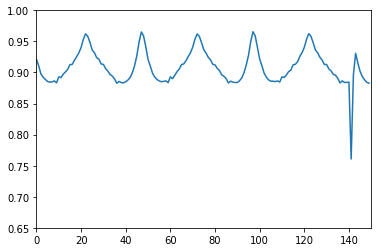

In [6]:
c = pims.open(cinefile)

N=len(c)
C = []

for i in range(N):
    if np.mod(i,10000)<150:
        mean1 = np.mean(c.get_frame(i),axis=(0,1))
        mean2 = np.mean(c.get_frame(i+1),axis=(0,1))
        std1 = np.std(c.get_frame(i),axis=(0,1))
        std2 = np.std(c.get_frame(i+1),axis=(0,1))

        C.append(np.mean((c.get_frame(i)-mean1)*(c.get_frame(i+1)-mean2),axis=(0,1))/(std1*std2))
        if np.mod(i,150)==149:
            plt.plot(C)
            plt.axis([0,150,0.65,1])
            C = []

In [91]:
cinefile

'/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/20181106_5_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2.hdf5'

In [95]:
c=cine.Cine(cinefile)
N = len(c)
timages =   np.asarray([c.get_time(i) for i in range(N)])
#plt.plot(timages)
#plt.plot(np.diff(timages))

tnew= timages[:-1]
jumps = np.logical_and(np.diff(timages)>1.,np.diff(timages)<5)
indices = np.where(jumps)[0]
print(indices)

waittime = np.diff(tnew[indices])
print(waittime)
#plt.figure()
#plt.hist(waittime)
print(np.max(waittime)-np.min(waittime))

instant = []
for i,ind in enumerate(indices[1:-1]):
    start = indices[i]+1
    end = indices[i+1]-1
#    plt.plot(np.diff(timages[start:end]))
    instant.append((start,end))
#plt.axis([0,10,0,4])
print(instant)

[   141    285    429    573    717    861   1005   1150   1295   1439
   1583   1727   1871   2015   2159   2303   2447   2591   2735   2879
   3023   3168   3313   3457   3601   3745   3889   4033   4177   4321
   4465   4609   4753   4897   5041   5185   5330   5475   5619   5763
   5907   6051   6195   6339   6483   6627   6771   6915   7059   7203
   7347   7492   7637   7781   7925   8069   8213   8357   8501   8645
   8789   8933   9077   9221   9365   9510   9655   9800   9944  10088
  10232  10376  10520  10664  10808  10952  11096  11240  11384  11528
  11673  11818  11962  12106  12250  12394  12538  12682  12826  12970
  13114  13258  13402  13546  13691  13836  13981  14125  14269  14413
  14557  14701  14845  14989  15133  15277  15421  15565  15709  15854
  15999  16143  16287  16431  16575  16719  16863  17007  17151  17295
  17439  17583  17727  17872  18017  18162  18306  18450  18594  18738
  18882  19026  19170  19314  19458  19602  19746  19890  20035  20180
  2032

In [64]:
a=range(100)
a[slice(start,end,sign(end-start))]

range(0, 20, -1)

In [100]:
cinefile.items()

AttributeError: 'str' object has no attribute 'items'

In [98]:
a=5
Nz=25

instantV = []
tV = []

for (start,end) in instant:
    if True:#od(start,5000)<300:
        C = []
        print(start)
        for i in range(start,end):
            mean1 = np.mean(c.get_frame(i),axis=(0,1))
            mean2 = np.mean(c.get_frame(i+1),axis=(0,1))
            std1 = np.std(c.get_frame(i),axis=(0,1))
            std2 = np.std(c.get_frame(i+1),axis=(0,1))

            C.append(np.mean((c.get_frame(i)-mean1)*(c.get_frame(i+1)-mean2),axis=(0,1))/(std1*std2))
    
        maximum=[]
        minimum=[]
        for i in range(a,len(C)-a):
            window = slice(i-a,i+a+1)
            if np.argmax(C[window])==a+1:
                maximum.append(i+1)
                plt.plot(i+1-maximum[0],C[i+1],'rx')
                if len(maximum)>1 and len(minimum)>0:
                    # get which way we are scanning
                    if (minimum[-1]-maximum[-2])<=Nz/2:
                        startV = maximum[-2]+start
                        endV = maximum[-1]+start
                    else:
                        startV = maximum[-1]+start
                        endV = maximum[-2]+start
                    instantV.append((startV,endV))
                    tV.append(c.get_time((startV+endV)//2))

                        
            if np.argmin(C[window])==a+1:
                if len(maximum)>0:
                    minimum.append(i+1)
                    
                    if (minimum[-1]-maximum[-1])<=Nz/2:
                        plt.plot(i+1-maximum[0],C[i+1],'bo')
                    else:
                        plt.plot(i+1-maximum[0],C[i+1],'k*')
                        #do a mirror symetry
                        
                
        plt.plot(C[maximum[0]:maximum[-1]])   
        plt.axis([0,150,0.65,1])

KeyboardInterrupt: 

127437
191
191
241
241
334
334
384
384
5077
5077
5127
5127
5177
5221
5221
5271
5271
5321
10110
10160
10160
10210
10254
10304
10304
10354
15141
15191
15191
15241
15241
15284
15334
15334
15384
15384


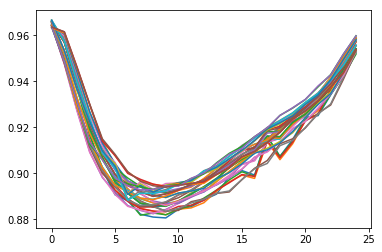

In [71]:
c = pims.open(cinefile)
print(c.len())

N=1000#00
C = []

tV = []
for (start,end) in instantV:
    C = []
    print(start)
    for i in range(start,end,np.sign(end-start)):
        mean1 = np.mean(c.get_frame(i),axis=(0,1))
        mean2 = np.mean(c.get_frame(i+1),axis=(0,1))
        std1 = np.std(c.get_frame(i),axis=(0,1))
        std2 = np.std(c.get_frame(i+1),axis=(0,1))
        
        C.append(np.mean((c.get_frame(i)-mean1)*(c.get_frame(i+1)-mean2),axis=(0,1))/(std1*std2))
    tV.append(c.get_time((start+end)//2))
    plt.plot(C)
    #plt.axis([0,150,0.65,1])
    

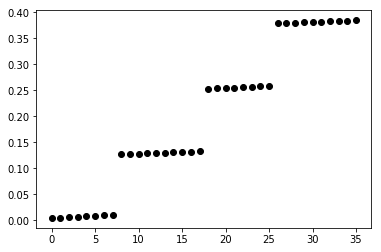

In [72]:
plt.plot(tV,'ko')

In [41]:
print(C)

[0.8360534885388544, 0.8986989297148239, 0.9068590967643677, 0.9137191883410888, 0.9307709907105218, 0.9480340099376704, 0.9632448449657696, 0.9610019624290971, 0.945644295087203, 0.9297092467730146, 0.9145987602367656, 0.907773403069057, 0.900630152584109, 0.896820768970488, 0.8952454069990687, 0.8945020003716084, 0.8956989469449852, 0.8952381159658375, 0.8956978276227563, 0.8994614713653374, 0.9024349956569591, 0.9067149174135216, 0.9092447524926952, 0.9136185136367253, 0.9181984029834, 0.9235376072957059, 0.9269636475281824, 0.9320244726130057, 0.937173851477447, 0.9438258874230968, 0.9536724550984569, 0.9619118124792707, 0.9598138631307864, 0.9517441630058974, 0.9429355502851833, 0.9375840525529444, 0.932101338096645, 0.9283807676917953, 0.9251980321187623, 0.9195509161214119, 0.9159998865395665, 0.9117085483026409, 0.9087194747379285, 0.9046132257601515, 0.899800497665308, 0.8977938258611741, 0.8950959278767908, 0.8946707027626538, 0.8930661594536597, 0.8940820475683092, 0.8955067

cool!
cool!
cool!
cool!
cool!
cool!


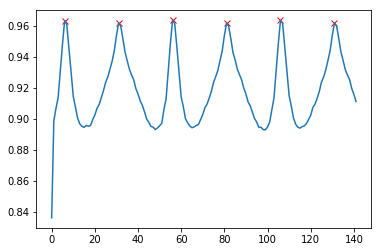

In [51]:

a=3
i=10

start = 0
end = len(C)
maximum=[]
for i in range(start+a,end-a):
    window = slice(i-a,i+a+1)
    if np.argmax(C[window])==a+1:
        print("cool!")
        maximum.append(i+1)
        plt.plot(i+1,C[i+1],'rx')
plt.plot(C)

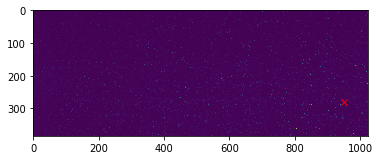

In [10]:
plt.imshow(c.get_frame(0))
plt.plot([950],[280],'rx')

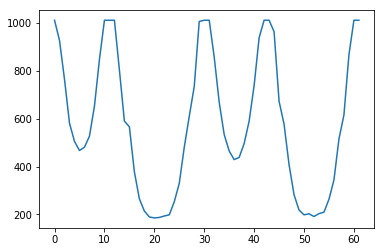

In [17]:
N=31*2
x = np.zeros(N)
for i in range(N):
    x[i]=c.get_frame(i)[280,950]
plt.plot(x)

In [44]:
parent_folder = '/media/stephane/' 
date = '20181106'
cine_name = l[0]
dataname = parent_folder+'DATA/Experimental_data/Turbulence3d/'+date+'/'+os.path.basename(cinefile).rsplit(".",1)[0]
save_folder = data_folder+ '/test1/'

dx =  0.277E-03#7.3469357156E-05
dt_orig = 1./40000

crop_lims=None
pre_constructed_masker = None
t0 = 0
a_frames = np.arange(t0,10000+t0,1)
frame_diff = 40

window_size = 32
overlap = 16

processing = piv.PIVDataProcessing('',cinefile,name_for_save=dataname,dx=dx,dt_orig=dt_orig,frame_diff=frame_diff,crop_lims=crop_lims,maskers=None,window_size=window_size,overlap=overlap,search_area_size=32)
processing.associate_flowfield()
ff = processing.data.ff[:3150*40,...]

dx : 
0.000277
dt_ab: 
0.001


In [27]:
ff.shape

(126000, 23, 63, 2)

In [45]:
 #convert 2d to 3d data
(Nt,Nx,Ny,Nc) = ff.shape
ff = np.reshape(ff,(int(Nt/frame_diff),frame_diff,Nx,Ny,Nc))

#keep only one way volume scan
#ff = ff[...]

ff[...,1] = -ff[...,1] #reverse sign of horizontal component
ff=ff[:,9:25,...]
print(ff.shape)

(3150, 16, 23, 63, 2)


In [46]:
#compute mean_flow
mean_flow = np.nanmean(ff,axis=0)
mean_flow_speed = np.linalg.norm(mean_flow,axis=2)
mean_speed = np.nanmean( np.sqrt(ff[...,0]**2 + ff[...,1]**2 ), axis=0)
fluc = ff - mean_flow    
u_rms = np.sqrt(np.nanmean(fluc[...,0]**2+fluc[...,1]**2 ,axis=0) )

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


24


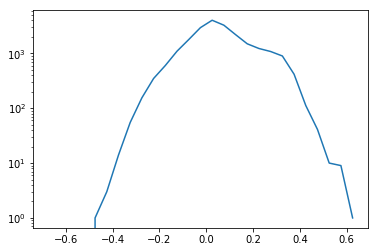

In [158]:
t0 = 1100

print(np.sum(np.isnan(fluc[t0,2:18,:-1,:-1,0])))

[n,x] = np.histogram(np.ndarray.flatten(fluc[t0,2:18,:-1,:-1,0]),np.arange(-0.7,0.7,0.05))
x = (x[1:]+x[:-1])/2
plt.semilogy(x,n)

In [33]:
def display_correlation(t,C):
    plt.subplot(1,3,1)
    plt.plot(t,C)
    plt.axis([-250,250,-0.2,1.05])
    graphes.legende('Time (ms)','$<u(t)u(t+\Delta t) >_{x,y,z}$','')

    plt.subplot(1,3,2)
    plt.plot(t,C)
    plt.axis([-75,75,0.75,1.05])
    graphes.legende('Time (ms)','','')

    plt.subplot(1,3,3)
    plt.plot(t,C)
    plt.axis([-15,15,0.9,1.01])
    graphes.legende('Time (ms)','','')

Total number of frames processed : 250


/home/stephane/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Volume with less than 5% error : 249


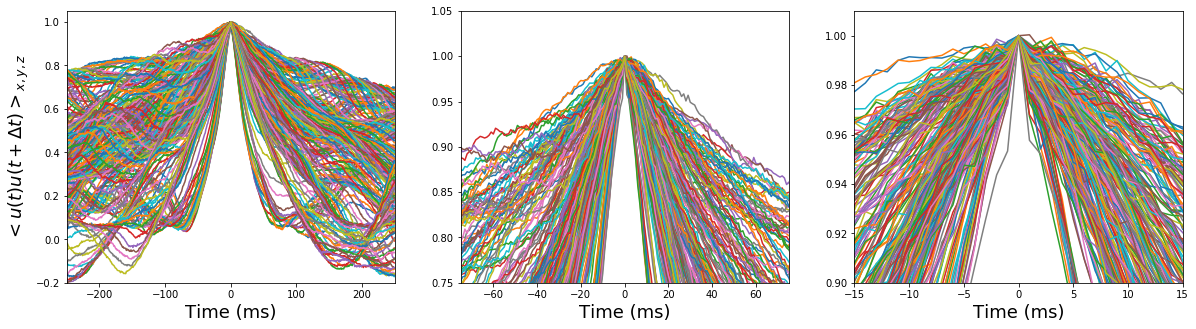

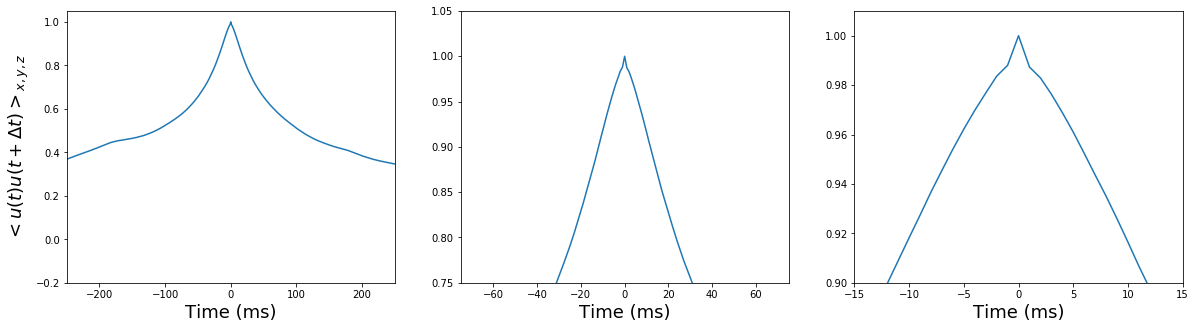

In [36]:
fig,axs=plt.subplots(1,3,figsize=(20,5))

good_frame = []
Ct = []
error = []
tlist = range(250,2750,10)
print("Total number of frames processed : "+str(len(tlist)))

for t0 in tlist:
    ff2 = np.nanmean(fluc[t0,2:18,...,0]**2,axis=(0,1,2))
    C = []
    t = np.arange(t0-250,t0+250,1)
    
    C0 = np.nanmean(fluc[t0+1,2:18,...,0]*fluc[t0,2:18,...,0],axis=(0,1,2))/ff2
    error.append(1-C0)
    if C0>0.95:  
        for tc in t:
#    print(tc)
            C0 = np.nanmean(fluc[tc,2:18,...,0]*fluc[t0,2:18,...,0],axis=(0,1,2))/ff2
            C.append(C0) 
        display_correlation(t-t0,C)        
        Ct.append(C)
        good_frame.append(t0)
Ct = np.asarray(Ct)

print("Volume with less than 5% error : "+str(Ct.shape[0]))
Ctmean = np.nanmean(Ct,axis=0)
tmean = t-t0

fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean)

[1500, 1600, 0, 0.8]

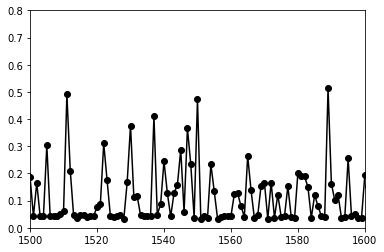

In [315]:
plt.plot(tlist,error,'ko-')
plt.axis([1500,1600,0,0.8])

In [211]:
print(fluc.shape)

(2999, 40, 23, 63, 2)


Correlation time (ms) : 91ms


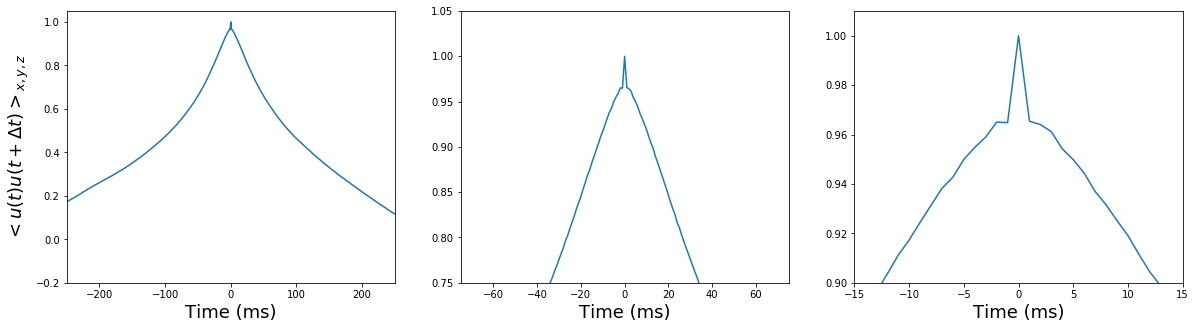

In [178]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean)

i = np.argmin(np.abs(Ctmean-0.5))
print('Correlation time (ms) : '+str(np.abs(tmean[i])) +' ms')

In [341]:
1024/384
41/17

2.411764705882353

In [50]:
#generate axis
(Nz,Nx,Ny,Nc) = mean_flow.shape
#mean_flow = np.transpose(mean_flow,(1,2,0,3))

dz = 42/20
x = np.arange(-(Nx-1)/2,(Nx-1)/2+1)*processing.dx*1E3*overlap+5
y = np.arange(-(Ny-1)/2,(Ny-1)/2+1)*processing.dx*1E3*overlap-120
z = np.arange(-Nz/2,Nz/2)*dz-2

#invariance by rotation in the plane (x,z)

[X,Z,Y] = np.meshgrid(x,z,y)
print(X.shape)

(16, 23, 63)


In [52]:
Xv = X[:,:-1,:-1]
Yv = Y[:,:-1,:-1]
Zv = Z[:,:-1,:-1]

flucv = fluc[...,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

#j0 = 4
print(Xv.shape)

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

R = np.sqrt((Xv-x0)**2+(Yv-y0)**2+(Zv-z0)**2)

ff2u = np.nanmean(flucv[:,k0,i0,j0,0]**2)
ff2v = np.nanmean(flucv[:,k0,i0,j0,1]**2)

Cmapu = flucv[...,0]*np.transpose(np.tile(flucv[:,k0,i0,j0,0],(Nz,Nx,Ny,1)),(3,0,1,2))
Cmapv = flucv[...,1]*np.transpose(np.tile(flucv[:,k0,i0,j0,1],(Nz,Nx,Ny,1)),(3,0,1,2))

print(Cmapu.shape)

(16, 22, 62)
(3150, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


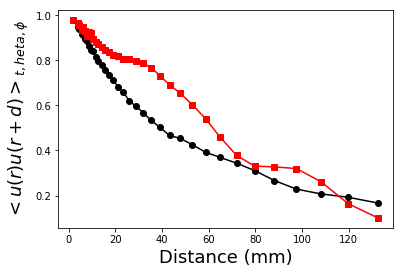

In [40]:
dlist = np.logspace(0,np.log10(np.max(R)),50)

Cdu = []
Cdv = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[:,indices])/ff2u
    C0v = np.nanmean(Cmapv[:,indices])/ff2v

    Cdu.append(C0u)
    Cdv.append(C0v)
    
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')

fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')

(16, 22, 62)
(1062, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


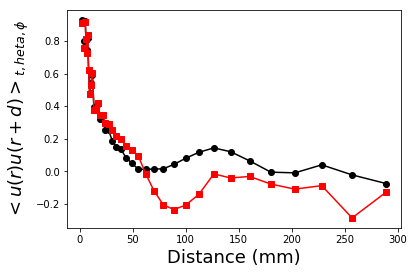

In [260]:
Xv = X[2:18,:-1,:-1]
Yv = Y[2:18,:-1,:-1]
Zv = Z[2:18,:-1,:-1]

flucv = fluc[:,2:18,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

j0 = 4
print(Xv.shape)

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

R = np.sqrt((Xv-x0)**2+(Yv-y0)**2+(Zv-z0)**2)

ff2u = np.nanmean(flucv[good_frame,k0,i0,j0,0]**2)
ff2v = np.nanmean(flucv[good_frame,k0,i0,j0,1]**2)

Cmapu = flucv[good_frame,...,0]*np.transpose(np.tile(flucv[good_frame,k0,i0,j0,0],(Nz,Nx,Ny,1)),(3,0,1,2))
Cmapv = flucv[good_frame,...,1]*np.transpose(np.tile(flucv[good_frame,k0,i0,j0,1],(Nz,Nx,Ny,1)),(3,0,1,2))

print(Cmapu.shape)
dlist = np.logspace(0,np.log10(np.max(R)),50)

Cdu = []
Cdv = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[:,indices])/ff2u
    C0v = np.nanmean(Cmapv[:,indices])/ff2v

    Cdu.append(C0u)
    Cdv.append(C0v)
    
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')

fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')

(3150, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice


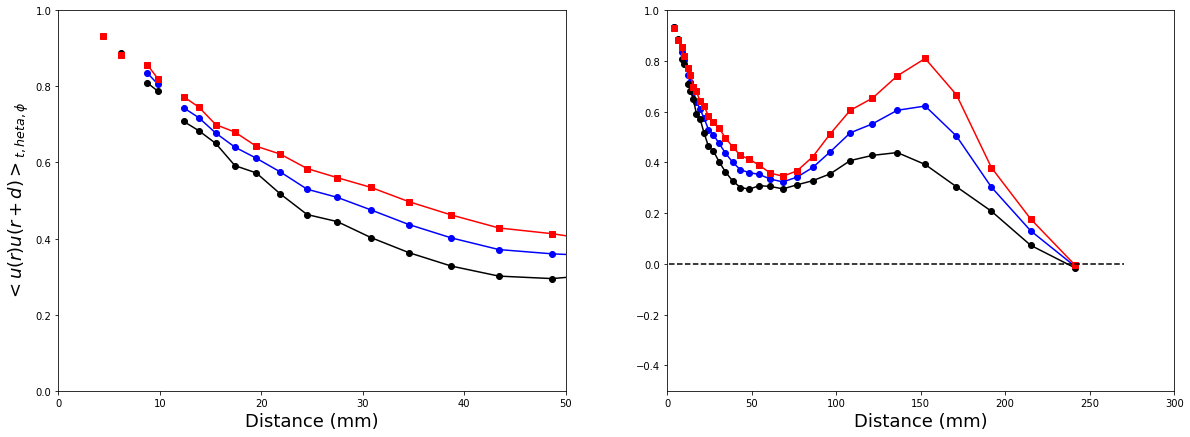

In [56]:
Xv = X[:,:-1,:-1]
Yv = Y[:,:-1,:-1]
Zv = Z[:,:-1,:-1]

flucv = fluc[...,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

j0 = 60
#i0 = 20

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

[R,Theta] = Smath.cart2pol(Xv-x0,Yv-y0)
#R = np.sqrt((Xv-x0)**2+(Yv-y0)**2)


ff2u = np.nanmean(flucv[...,i0,j0,0]**2)
ff2v = np.nanmean(flucv[...,i0,j0,1]**2)

Cmapu = flucv[...,0]*np.transpose(np.tile(flucv[...,i0,j0,0],(Nx,Ny,1,1)),(2,3,0,1))
Cmapv = flucv[...,1]*np.transpose(np.tile(flucv[...,i0,j0,1],(Nx,Ny,1,1)),(2,3,0,1))

print(Cmapu.shape)
dlist = np.logspace(np.log10(1),np.log10(np.max(R)),50)

Cdu = []
Cdv = []
Cd = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[...,indices])
    C0v = np.nanmean(Cmapv[...,indices])
    
    Cd.append((C0u+C0v)/(ff2u+ff2v))
#    C0l = 
#    C0t = 
    Cdu.append(C0u/ff2u)
    Cdv.append(C0v/ff2v)

fig,axs=plt.subplots(1,2,figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(dlist[:-1],Cd,'bo-')
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')
plt.axis([0,50,0,1])
fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')
                  
plt.subplot(1,2,2)
plt.plot(dlist[:-1],Cd,'bo-')
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')
plt.plot(dlist,np.zeros(len(dlist)),'k--')
plt.axis([0,300,-0.5,1])
fig = graphes.legende('Distance (mm)','','')

In [60]:
Ek = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,:-1,:-1,0]**2,axes=(1,2,3)),axes=(1,2,3)))

In [61]:
print(Ek.shape)
np.sum(np.isnan(np.ndarray.flatten(Ek)))

(3150, 16, 22, 62)


68745600

(16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


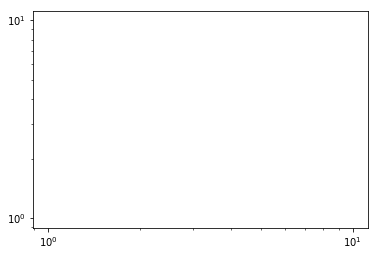

In [64]:
(Nt,Nz,Nx,Nt) = Ek.shape

kx = np.linspace(-Nx//2,Nx//2,Nx)
ky = np.linspace(-Ny//2,Ny//2,Ny)
kz = np.linspace(-Nz//2,Nz//2,Nz)

[Kx,Kz,Ky] = np.meshgrid(kx,kz,ky)
print(Kx.shape)

K = np.sqrt(Kx**2 + Ky**2 + Kz**2)

Klist = np.logspace(0,np.log10(np.max(K)),50)
E1d = []
for i,k0 in enumerate(Klist[:-1]):
    indices = np.logical_and(K>=Klist[i],K<Klist[i+1])
    #print(Ek[250,indices])
    val = np.nanmean(Ek[:,indices])
    E1d.append(val)

print(E1d)
plt.loglog(Klist[:-1],E1d,'ko-')
#plt.loglog(Klist,100*Klist**(-5./3),'r-')

In [266]:
a = np.ones((299,40))
np.transpose(np.tile(a,(23,63,1,1)),(2,3,0,1)).shape

(299, 40, 23, 63)

1475


[1200, 1750, -0.2, 1.05]

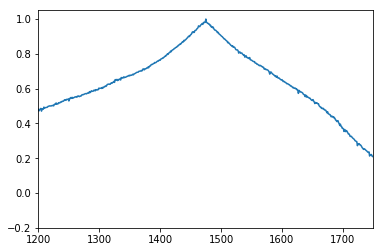

In [111]:
t = np.arange(0,2950,1)
n = len(t)
t0 = t[(n+1)//2]
print(t0)
ff2 = np.nanmean(fluc[t0,2:18,...,1]**2,axis=(0,1,2))
C = []
for tc in t:
#    print(tc)
    C.append(np.nanmean(fluc[tc,2:18,...,1]*fluc[t0,2:18,...,1],axis=(0,1,2))/ff2) 
plt.plot(t,C)
plt.axis([1200,1750,-0.2,1.05])

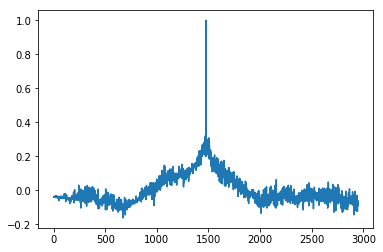

In [28]:
print(mean_flow.shape)
print(X[:,:,:].shape)

(40, 23, 63, 2)
(40, 23, 63)


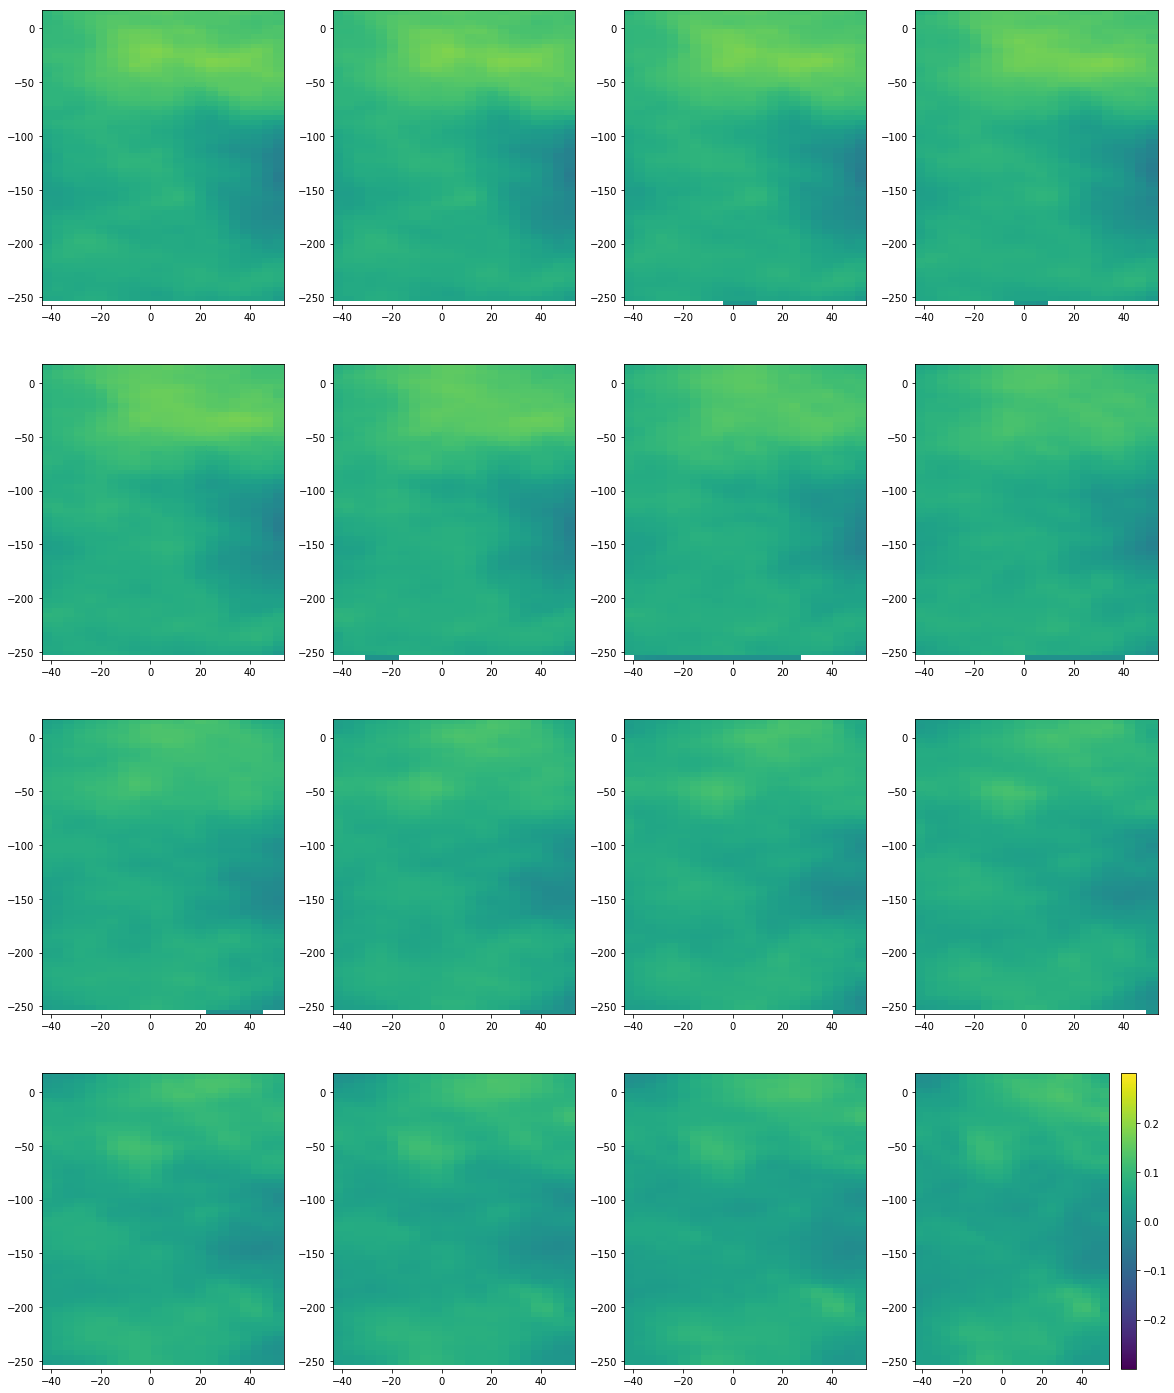

In [68]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],mean_flow[i*4+j,...,0],vmin=-0.3,vmax=0.3)
#    plt.colorbar()
plt.colorbar()

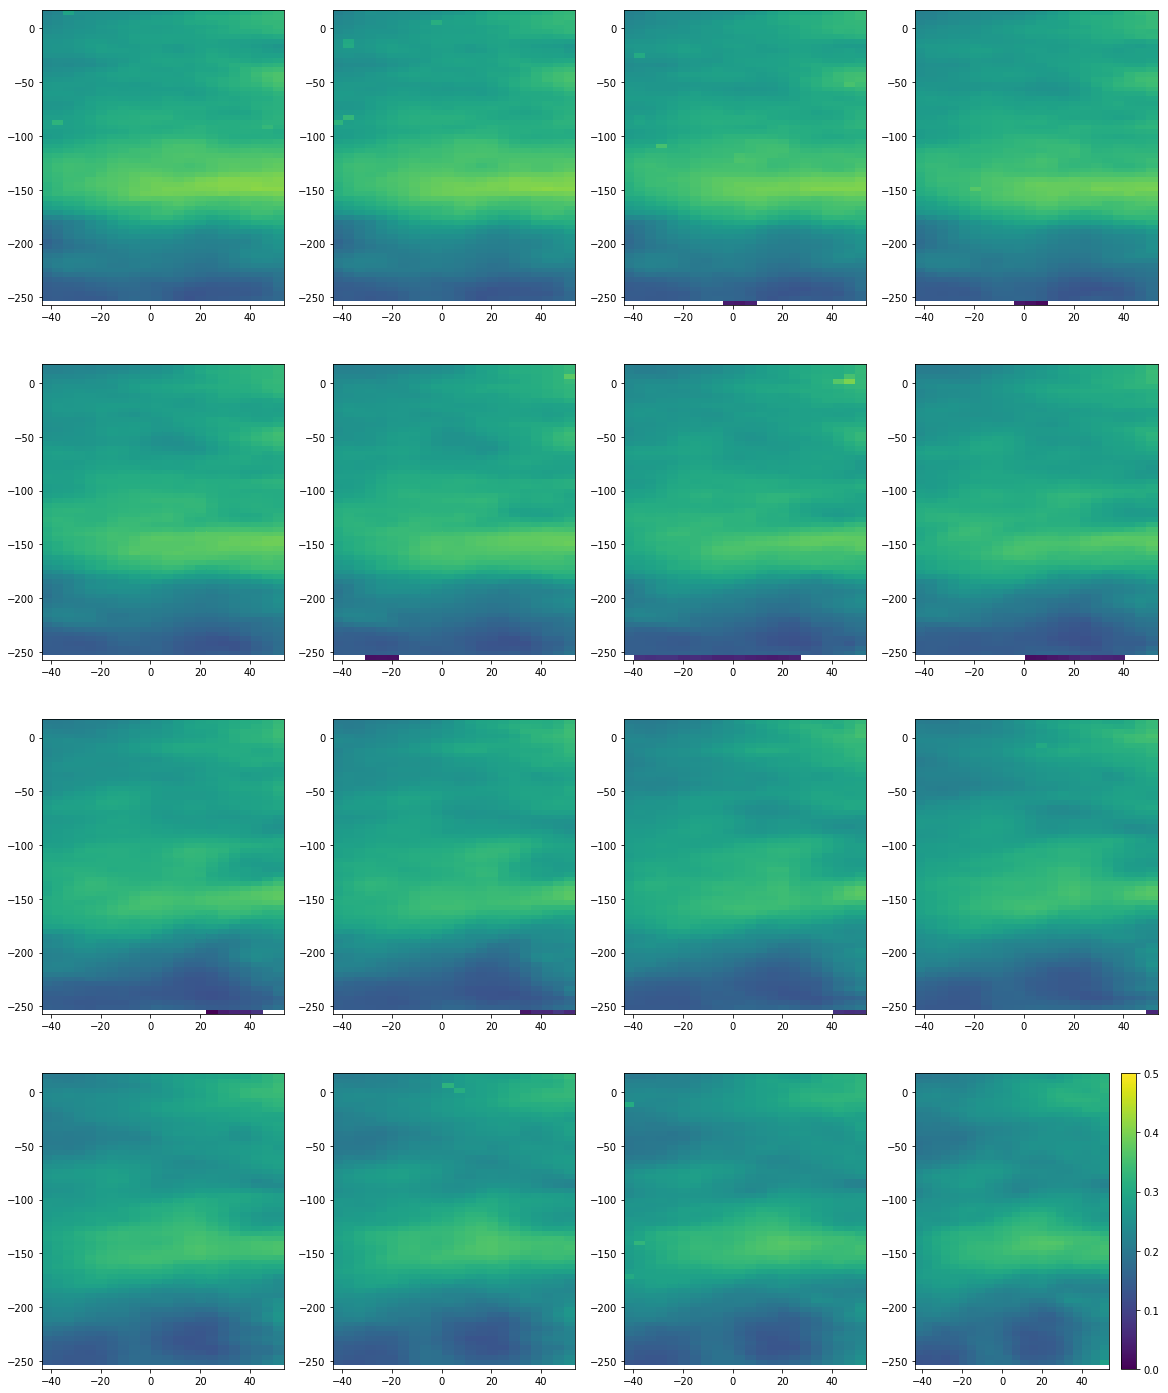

In [67]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],u_rms[i*4+j,...],vmin=0,vmax=0.5)
plt.colorbar()

(23, 63)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


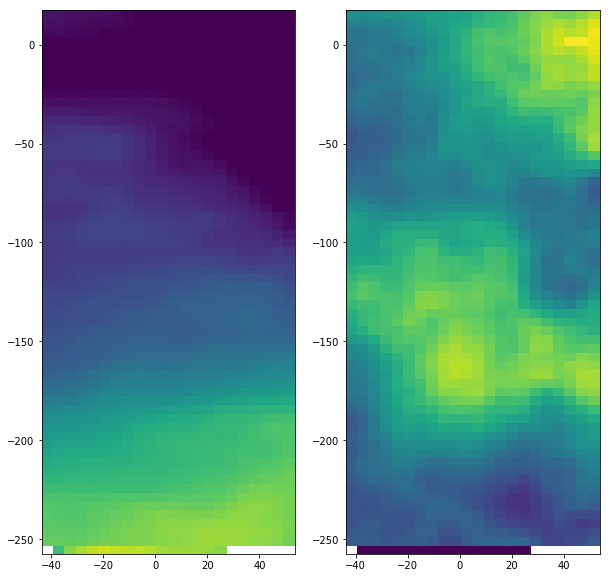

In [69]:
fig,axs=plt.subplots(1,2,figsize=(10,10))
print(mean_flow[10,...,0].shape)
axs[0].pcolormesh(X[0,...],Y[0,...],mean_flow[6,...,1],vmin=-0.3,vmax=0.3)
#plt.colorbar()

axs[1].pcolormesh(X[0,...],Y[0,...],np.nanmean(fluc[:,6,...,0]**2,axis=0),vmin=0,vmax=0.05)
#plt.colorbar()

In [338]:
[R,Theta] = Smath.cart2pol(X,Z)
Ur = 2*mean_flow[...,1]*np.cos(Theta)  #coefficient to be compensated by the circle fraction avalaible, so the coeff is r dependent
Utheta = -2*mean_flow[...,1]*np.sin(Theta) #average along Theta still required

fur = interp.RegularGridInterpolator((z,x,y),Ur,method='linear',bounds_error=False,fill_value=np.nan)
fut = interp.RegularGridInterpolator((z,x,y),Utheta,method='linear',bounds_error=False,fill_value=np.nan)
fuz = interp.RegularGridInterpolator((z,x,y),mean_flow[...,0],method='linear',bounds_error=False,fill_value=np.nan)

#futheta = interp.RegularGridInterpolator(Utheta, values, method='linear', bounds_error=True, fill_value=nan)[source]


In [248]:
print(Ur.shape)

(16, 31, 63)


In [242]:
helicity = fur((R[:,:,40]*np.cos(Theta[:,:,]),x[5],y[40]))

array([-0.073379  , -0.07342986, -0.06604033, -0.06482857, -0.06580828,
       -0.06344544, -0.05669815, -0.04911837, -0.03393364, -0.02424669,
       -0.01768416, -0.01310526, -0.00867227, -0.00059881,  0.00032977,
        0.00036066])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


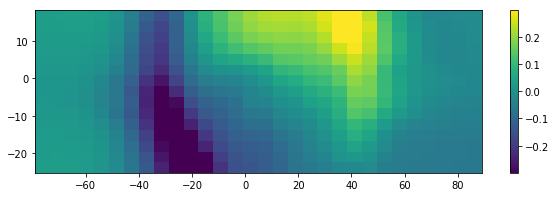

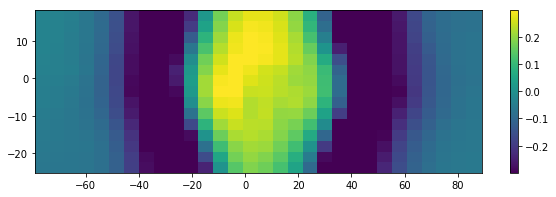

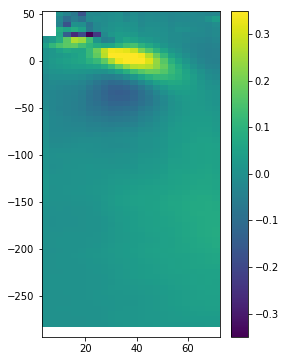

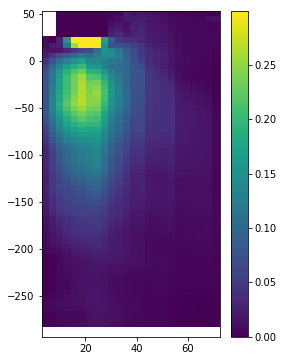

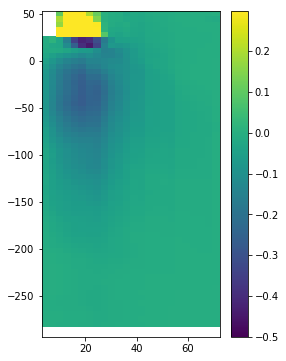

In [340]:
k =52

fig,axs=plt.subplots(1,1,figsize=(10,3))
plt.pcolormesh(X[...,0],Z[...,0],mean_flow[...,k,1],vmin=-0.3,vmax=0.3)
plt.colorbar()

fig,axs=plt.subplots(1,1,figsize=(10,3))
plt.pcolormesh(X[...,0],Z[...,0],mean_flow[...,k,0],vmin=-0.3,vmax=0.3)
plt.colorbar()



#fig,axs=plt.subplots(1,1,figsize=(10,3))
#plt.pcolormesh(X[...,0],Z[...,0],Ur[...,k],vmin=-0.3,vmax=0.3)
dtheta = 2*np.pi/50
theta = np.arange(np.pi/2,2*np.pi+np.pi/2,dtheta)
dr = dz
R0 = np.arange(dz,dz*(Nx-5),dz)
Nr = len(R0)

#plt.plot(np.min(R0)*np.cos(theta),np.min(R0)*np.sin(theta),'r')
#plt.plot(np.max(R0)*np.cos(theta),np.max(R0)*np.sin(theta),'r')

UR = np.zeros((Ny,Nr))
UT = np.zeros((Ny,Nr))
UZ = np.zeros((Ny,Nr))

for i in range(len(y)):
    for j,r0 in enumerate(R0):
        UR[i,j] = np.nanmean(fur((r0*np.cos(theta),r0*np.sin(theta),y[i])))
        UT[i,j] = np.nanmean(fut((r0*np.cos(theta),r0*np.sin(theta),y[i])))
        UZ[i,j] = np.nanmean(fut((r0*np.cos(theta),r0*np.sin(theta),y[i])))
    

fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,UR,vmin=-0.35,vmax=0.35)
plt.colorbar()


fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,-UT,vmin=0.,vmax=0.3)
plt.colorbar()

fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,UZ,vmin=-0.5,vmax=0.3)
plt.colorbar()

y
#fig,axs=plt.subplots(1,1,figsize=(10,3))
#plt.pcolormesh(X[...,0],Z[...,0],Utheta[...,k],vmin=-0.3,vmax=0.3)
#plt.colorbar()



#fig,axs=plt.subplots(1,1,figsize=(5,8))
#plt.pcolormesh(X[0,...],Y[0,...],mean_flow[6,...,1],vmin=-0.3,vmax=0.3)
#plt.colorbar()

In [192]:
#definition of mask
x0 = 175
y0 = 130
width = 120
height = 50

ValueError: cannot reshape array of size 31248 into shape (1,63)

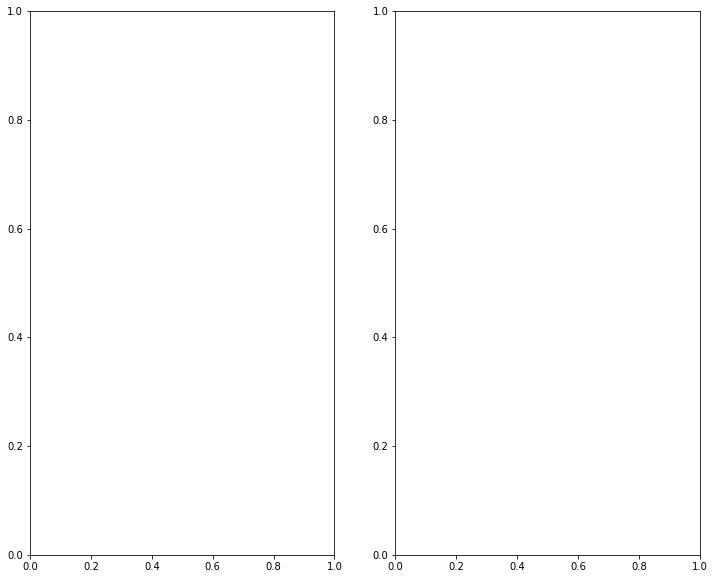

In [121]:
fig,axs=plt.subplots(1,2,figsize=(12,10)); axs=axs.flatten()
cax=[]
c=[]
j = 10
#for i in range(2):
#    divider = make_axes_locatable(axs[i])
#    cax.append(divider.append_axes('right', size='10%', pad=0.1))
    
for (i,data) in zip(range(2),[mean_speed[j,:,:],u_rms[j,:,:]]):
    #axs[i].clear()
    cb=axs[i].pcolormesh(X,Y,data,vmin=0,vmax=0.4)
#            cb=axs[i].pcolormesh(X,Y,ff[0,j,:,:,1],vmin=0,vmax=0.3)
#    fig.colorbar(cb)
#    c.append(fig.colorbar(cb, cax=cax[i], orientation='vertical'))

    axs[0].set_title(r'$y = '+str(int(z[j]))+' mm')
        #axs[1].set_title(r'$\bar u_{rms}$')

    axs[0].set_xlabel('$z$ (mm)')
    axs[i].set_xlabel('$x$ (mm)')
    #c[0].set_label(r'$\bar u$ (m/s)')
    #c[0].set_label(r'$\bar u_{rms}$ (m/s)')
    
    p=patches.Rectangle((x0,y0),width,height,facecolor='w',edgecolor='r')
    axs[i].add_patch(p)